In [5]:
import dask.dataframe as dd
df = dd.read_csv("netflix_titles.csv")
df.head() 
df.info() 

<class 'dask_expr.DataFrame'>
Columns: 12 entries, show_id to description
dtypes: int64(1), string(11)

In [19]:
miss = df.isnull().sum().compute()
print(miss)
df = df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'rating': 'Not Rated','country':'unknown'})
df = df.dropna(subset=['title', 'release_year'])

show_id           0
type              0
title             0
director          0
cast              0
country         831
date_added       98
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64


In [9]:
df = df.drop_duplicates()

In [11]:
df['release_year'] = df['release_year'].astype('int32')
df['date_added'] = dd.to_datetime(df['date_added'], errors='coerce')

In [13]:
df.to_csv('cleaned_netflix_titles.csv', index=False, single_file=True)


['C:\\Users\\srika\\cleaned_netflix_titles.csv']

In [15]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
df.to_csv('cleaned_netflix_titles.csv', index=False, single_file=True)


['C:\\Users\\srika\\cleaned_netflix_titles.csv']

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

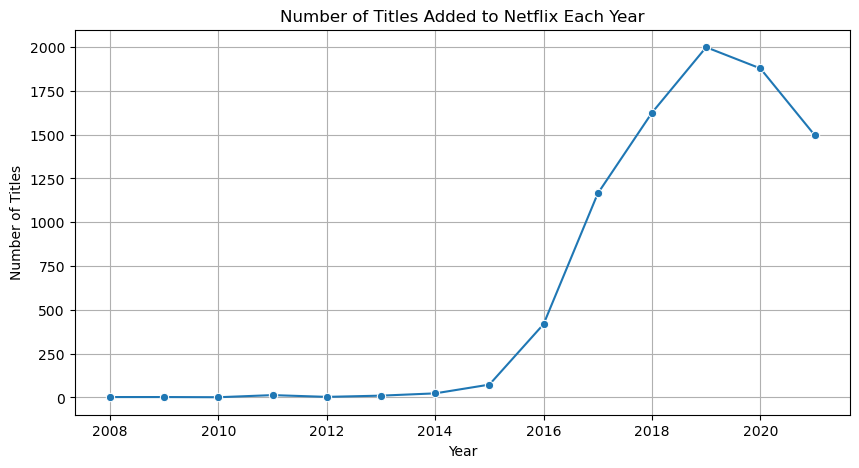

C:\Users\srika\AppData\Local\Temp\ipykernel_16724\2283233188.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


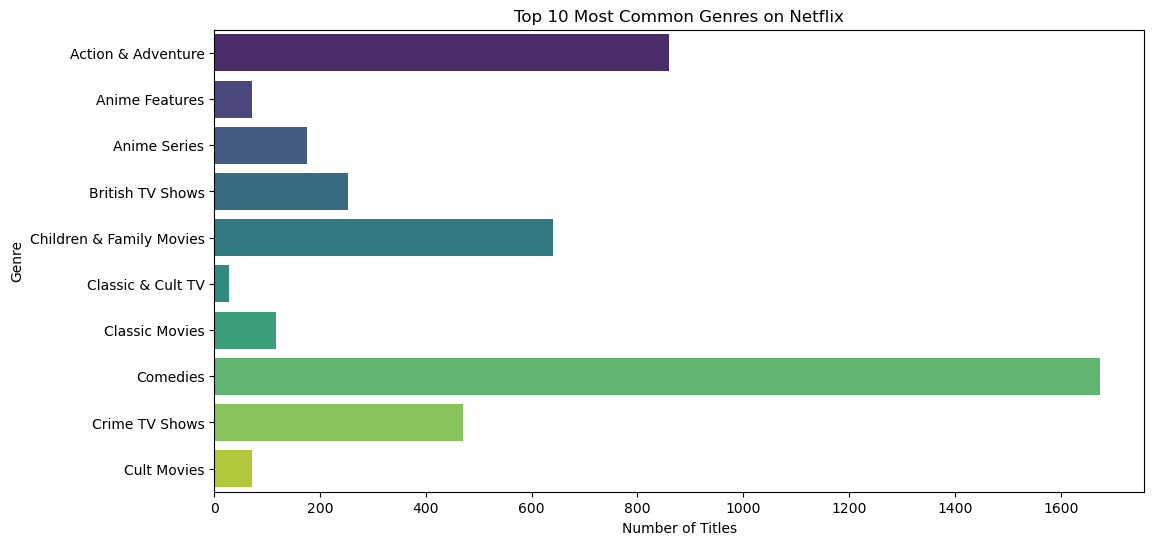

In [13]:
df = dd.read_csv("cleaned_netflix_titles.csv")
df["date_added"] = dd.to_datetime(df["date_added"], errors='coerce')
df["year_added"] = df["date_added"].dt.year
yearly_trend = df["year_added"].value_counts().compute().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o")
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


df_exploded = df.assign(genre=df["listed_in"].str.split(", ")).explode("genre")


genre_counts = df_exploded["genre"].value_counts().compute().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


In [15]:
df.to_csv('cleaned_netflix_titles.csv', index=False, single_file=True)


['C:\\Users\\srika\\cleaned_netflix_titles.csv']